In [1]:
import numpy
import sys
# sys.path.append("/home/wian/Documents/BEng_Hons/Skogestad-Python/")
import utils
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting Singular Values Across Frequency

In [2]:
Kc = 1
def G(s):
    G11 = 4.29 * numpy.exp(-2.6 * s) / ((6.7 * s + 1))
    G12 = -2.38 * numpy.exp(-3.5 * s) / ((8.64 * s + 1))
    G13 = -2.156 * numpy.exp(-s) / ((9.06 * s + 1))
    G21 = 7.215 * numpy.exp(-6.5 * s) / ((3.25 * s + 1))
    G22 = -9.218 * numpy.exp(-3.0 * s) / ((5.0 * s + 1))
    G23 = -2.156 * numpy.exp(-s) / ((9.06 * s + 1))
    G31 = -0.5635 * numpy.exp(-9.2 * s) / ((8.15 * s + 1))
    G32 =  0.451143 * numpy.exp(-9.4 * s) / ((10.9 * s + 1))
    G33 = 1.1 * (10.1*s + 0.87) * numpy.exp(-s) / ((3.89 * s + 1)*(18.8*s + 1))
    return numpy.diag([Kc, Kc, Kc])*numpy.matrix([[G11, G12, G13],
                         [G21, G22, G23],
                         [G31, G32, G33]])

In [10]:
omega = numpy.logspace(-3,3,1000)

In [11]:
s = omega*1j

In [12]:
freq_responses = [G(si) for si in s]

In [13]:
def sigma(Gfr):
    return numpy.linalg.svd(Gfr)

In [14]:
sigmas = [sigma(G_fr)[1] for G_fr in freq_responses]
sigmas[0], sigmas[-1]

(array([12.90885196,  2.20755321,  0.55958636]),
 array([0.00293661, 0.00055712, 0.00014795]))

In [15]:
sigmas = numpy.array(sigmas)

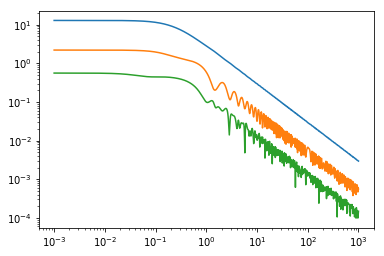

In [16]:
plt.loglog(omega, sigmas)

# Analysing the input and output directions across frequency

In [33]:
def sinusoid(omega, r):
    gain = numpy.abs(r)
    phase = numpy.angle(r)
    return gain*numpy.sin(ts*omega + phase)

In [34]:
ts = numpy.linspace(0,10,1000)

In [35]:
def dirplot(omega_e, index):
    omega_c = 10**omega_e
    plt.subplot(3,1,1)
    plt.axvline(omega_c)
    plt.loglog(omega, sigmas)
    U, sigma, V = numpy.linalg.svd(G(omega_c*1j))
    V = V.H
    plt.subplot(3,1,2)
    plt.plot(ts, sinusoid(omega_c, V[0,index]))
    plt.plot(ts, sinusoid(omega_c, V[1,index]))
    plt.subplot(3,1,3)
    plt.plot(ts, sigma[0]*sinusoid(omega_c, U[0,index]))
    plt.plot(ts, sigma[0]*sinusoid(omega_c, U[1,index]))

In [36]:
from ipywidgets import interact

In [37]:
interact(dirplot, omega_e = (0.0001, 2), index=[0,1])

interactive(children=(FloatSlider(value=1.00005, description='omega_e', max=2.0, min=0.0001), Dropdown(descrip…

<function __main__.dirplot(omega_e, index)>

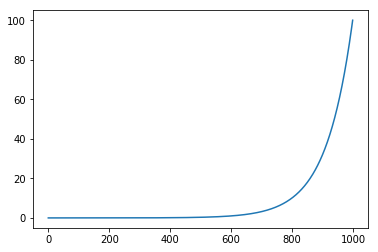

In [38]:
plt.plot(omega)

# Determining bandwidth and Plotting S($\sigma$)

In [39]:
Kc = 1
def S(s):
    return numpy.linalg.inv(numpy.eye(3) + numpy.diag([Kc, Kc, Kc])*G(s))

S(1)

matrix([[ 9.60244786e-01,  7.75167379e-03,  7.29728045e-02],
        [-2.65334347e-03,  1.08280306e+00,  8.14275233e-02],
        [ 5.72111834e-06, -3.20085968e-06,  9.56161077e-01]])

In [40]:
S_freq_responses = [S(si) for si in s]

In [41]:
S_sigmas = [sigma(G_fr)[1] for G_fr in S_freq_responses]

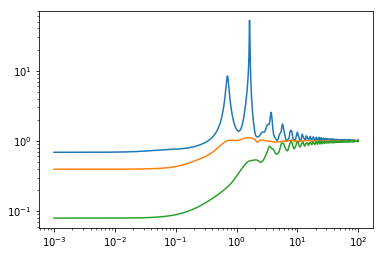

In [42]:
S_sigmas = numpy.array(S_sigmas)
plt.loglog(omega, S_sigmas)

In [43]:
Kc = 1
def T(s):
    return G(s)*numpy.linalg.inv(numpy.eye(3) + numpy.diag([Kc, Kc, Kc])*G(s))

In [44]:
T_freq_responses = [T(si) for si in s]

In [45]:
T_sigmas = [sigma(G_fr)[1] for G_fr in T_freq_responses]

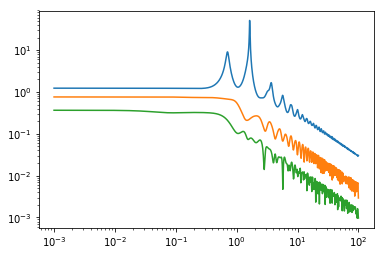

In [46]:
T_sigmas = numpy.array(T_sigmas)
plt.loglog(omega, T_sigmas)

In [47]:
omega_c = numpy.interp(1, T_sigmas[:,0][::-1], omega[::-1])
omega_c

2.0809368799665466

In [48]:
Bandwidth = [0,0]

Bandwidth[0] = numpy.interp(1/numpy.sqrt(2), S_sigmas[:,1], omega)
Bandwidth[1] = numpy.interp(1/numpy.sqrt(2), S_sigmas[:,2], omega)

Bandwidth

[0.4172144678825603, 3.2042157059657788]

In [52]:
utils.RGA(G(0))

array([[ 2.11123578, -0.84907281, -0.26216297],
       [-0.59035419,  1.67068873, -0.08033454],
       [-0.52088159,  0.17838408,  1.34249751]])

In [53]:
utils.RGA(G(omega_c*1j))

/home/wian/Documents/BEng_Hons/Skogestad-Python/utils.py:1514: ComplexWarning: Casting complex values to real discards the imaginary part
  G = numpy.asmatrix(G).astype('float')


array([[-1.13275232,  2.6556345 , -0.52288218],
       [ 2.22165023, -1.02529259, -0.19635764],
       [-0.08889791, -0.63034191,  1.71923981]])

In [61]:
RGA_numbers = [utils.RGA(G(s)).diagonal() for s in omega*1j]

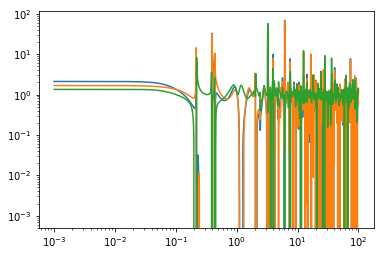

In [65]:
plt.loglog(omega, RGA_numbers)